## Dharani data and annotation sample

In [1]:
import sys
sys.path.append('..')
from dharani_functions import DharaniHelper

In [2]:
helper = DharaniHelper(specimennum=1,downsample=3)

In [3]:
DharaniHelper?

Init signature: DharaniHelper(specimennum, downsample=3)
Docstring:      Helper for simplified access to Dharani image and annotation data from AWS s3 bucket s3://dharani-fetal-brain-atlas
Init docstring:
specimennum : [1,2,3,4,5]

mpp = 2^downsample
downsample = 3 [default] => mpp=8
File:           c:\users\keerthi\code\hbp\sgbc_dharani_data_tutorial\dharani_data_tutorial\dharani_functions.py
Type:           type
Subclasses:     

In [4]:
helper.get_section_numbers()

[1009]

In [5]:
secnum = 1009

Load section image at resolution 2^downsample micron per pixel (mpp)

In [6]:
im_arr = helper.get_sectionimage(secnum)

In [7]:
im_arr.shape

(8000, 8000, 3)

Load annotation of the section. This fetches a dict of polygons. The keys are ontology ids, and the values are the annotated regions

In [8]:
annot = helper.get_annotation(secnum)

In [9]:
len(annot)

103

Load the ontology, to interpret the ids

In [10]:
from ontology_handling import TreeHelper

In [11]:
ontohelper = TreeHelper('dharani')

In [12]:
TreeHelper?

Init signature: TreeHelper(ontoname='dharani')
Docstring:      Abstracts ontology tree reading, searching and navigation for Dharani and Allen nomenclature
Init docstring: ontoname: ['dharani', 'allen_devhuman'] 
File:           c:\users\keerthi\code\hbp\sgbc_dharani_data_tutorial\dharani_data_tutorial\ontology_handling.py
Type:           type
Subclasses:     

Load the functions to display annotations

In [14]:
from nb_functions import display_annotation, display_annotation_tree

In [15]:
display_annotation_tree(annot, ontohelper)

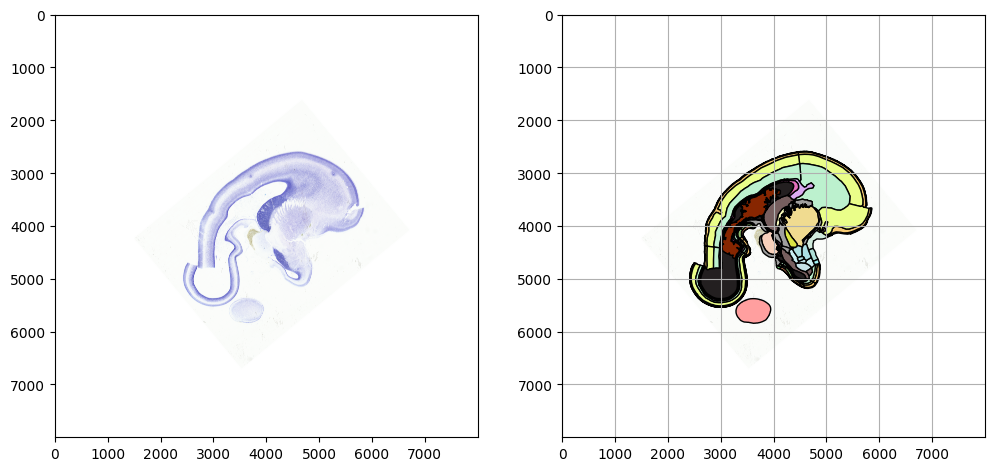

In [14]:
display_annotation(im_arr, annot, ontohelper)

In [45]:
aa=list(range(7))

In [46]:
aa

[0, 1, 2, 3, 4, 5, 6]

In [54]:
aa.pop()

IndexError: pop from empty list

In [15]:
from annotation_handling import get_level_ids, get_reachable_parents, get_nonreachable

In [73]:
reachable = get_reachable_parents2(annot, ontohelper)

In [72]:
def get_reachable_parents2(annot:'Annotation', ontohelper:TreeHelper):
    reachable1 = defaultdict(list) # parent: [annotated]
    reachable2 = defaultdict(list) # parent: [aggregatable]

    for ontoid in annot:
        
        par = ontohelper.onto_lookup[ontoid].parentid
        if ontoid not in reachable1[par]:
            reachable1[par].append(ontoid)

        anclist = list(reversed(ontohelper.get_ancestor_ids(ontoid)))
        oid = par # same as anclist[0]
        for ii in range(1,len(anclist)): 
            par = anclist[ii]
            if oid not in reachable2[par] and oid not in annot:
                reachable2[par].append(oid)
            oid = par

    reachable = {}
    for k in reachable1:
        reachable[k]=[reachable1[k],[]]

    for k in reachable2:
        if k in reachable:
            reachable[k][1]=reachable2[k]
        else:
            reachable[k]=[[],reachable2[k]]

    return reachable


In [74]:
reachable

{93: [[98, 94, 95, 96, 97, 99, 100], []],
 85: [[90, 91, 92, 88, 87, 89, 86], []],
 83: [[386, 387, 388], []],
 66: [[68, 67, 72, 73], [93, 85, 74, 101]],
 387: [[422, 423], []],
 388: [[424, 425], []],
 235: [[247, 245], []],
 5000: [[1016, 1026, 1000, 158], [442]],
 74: [[82], [83]],
 386: [[421, 420], []],
 101: [[102, 103, 107, 106, 108, 104, 105], []],
 38: [[42, 41, 40, 39, 43, 44, 45], []],
 216: [[219], []],
 3000: [[244, 243, 253, 417], [235, 232]],
 21: [[22, 23, 25, 24], []],
 4: [[131, 134], [64, 38, 21, 12, 29, 47, 55]],
 141: [[143, 142], []],
 442: [[156, 441], []],
 137: [[290, 289], []],
 135: [[293, 393, 295], [137, 136]],
 12: [[13, 14, 15, 16, 18, 19, 17], []],
 259: [[167], []],
 160: [[176], [259]],
 29: [[35, 36, 30, 31, 32, 33, 34], []],
 6000: [[229, 226], []],
 232: [[236], []],
 3: [[135], [4, 140]],
 47: [[54, 50, 48, 51, 52, 53, 49], []],
 136: [[286, 287], []],
 56: [[61, 58, 59, 60, 57], []],
 145: [[146], []],
 64: [[], [66]],
 2: [[], [3, 159]],
 1: [[]

In [36]:
nonreachable, nrleaves = get_nonreachable(annot,ontohelper)

In [37]:
nonreachable

defaultdict(list,
            {389: [426, 427],
             109: [110, 111, 112, 113, 114, 115, 116],
             118: [500, 501, 502, 503, 504, 505, 506],
             120: [121, 122, 123, 124, 125, 126, 127, 128, 129],
             148: [149, 153, 154, 313],
             149: [150, 151],
             155: [439],
             254: [161, 459, 162, 416, 255],
             260: [171, 333, 391, 170],
             256: [163, 164, 165],
             257: [258, 166, 395, 390],
             282: [329, 330, 383, 331, 332, 401, 402, 380, 174, 175],
             380: [381, 382],
             172: [394, 399],
             177: [413,
              384,
              178,
              179,
              418,
              180,
              181,
              182,
              183,
              184,
              185,
              298,
              299,
              409,
              410,
              306,
              186,
              187,
              411,
              412,
       

In [40]:
len(nrleaves), len(nonreachable)

(147, 40)

In [79]:
ontohelper.onto_lookup[134]

NodeRecord(acronym='OLF', name='Olfactory cortex', color_hex_triplet='#D1EBDD', level=4, parentid=4, numchildren=0)

In [27]:
ontohelper.get_sibling_ids(109)

[67, 68, 69, 70, 71, 72, 73, 74, 85, 93, 101, 109]

In [76]:
ontohelper.print_subtree_at_id(134)

         [4] 134 (OLF) Olfactory cortex


In [19]:
level_ids = get_level_ids(annot, ontohelper)

In [31]:
freq = [0]*(max(level_ids)+1)
for lev,ids in sorted(level_ids.items()):
    freq[lev]=len(ids)/len(annot)

In [12]:
to_draw_list = ontohelper.get_ids_by_level(4)

In [15]:


from collections import defaultdict
draw_ids = defaultdict(list) # parent:[children]

for annot_id in annot:
    if annot_id in to_draw_list:
        draw_ids[annot_id].append(annot_id)
    else:
        anclist = ontohelper.get_ancestor_ids(annot_id)
        for elt in reversed(anclist):
            if elt in to_draw_list:
                draw_ids[elt].append(annot_id)
                break


In [13]:
draw_ids.keys()

dict_keys([64, 38, 21, 131, 134, 141, 137, 293, 12, 259, 176, 29, 47, 136, 55, 393, 145, 295])

In [19]:
from annotation_handling import get_supershape

In [1]:
# with a list of desired shapes, use get_supershape to merge leaves 



In [14]:
parshapes = {}
for par, chlist in draw_ids.items():
    print(ontohelper.onto_lookup[par])
    parshp = None
    for chi in chlist:
        print('\t',ontohelper.onto_lookup[chi])
        if parshp is None:
            parshp = annot[chi]
        else:
            parshp = parshp.union(annot[chi])

    parshapes[par]=parshp

NodeRecord(acronym='AlCTx', name='Allocortex', level=4, parentid=4, color_hex_triplet='#9BC680')
	 NodeRecord(acronym='IZ-PRESUB', name='Intermediate zone, presubiculum', level=7, parentid=93, color_hex_triplet='#bcf1ce')
	 NodeRecord(acronym='IZ-SUB', name='Intermediate zone, subiculum', level=7, parentid=85, color_hex_triplet='#bcf1ce')
	 NodeRecord(acronym='SVZ-SUB', name='Subventricular zone, subiculum', level=7, parentid=85, color_hex_triplet='#dbabf2')
	 NodeRecord(acronym='VZ-SUB', name='Ventricular zone, subiculum', level=7, parentid=85, color_hex_triplet='#e670be')
	 NodeRecord(acronym='CA1', name='CA1 field of hippocampus', level=8, parentid=83, color_hex_triplet='#8DBF6F')
	 NodeRecord(acronym='CA2', name='CA2 field of hippocampus', level=8, parentid=83, color_hex_triplet='#8DBF6F')
	 NodeRecord(acronym='CP-SUB', name='Cortical plate, subiculum', level=7, parentid=85, color_hex_triplet='#f6ca72')
	 NodeRecord(acronym='MZ-HPF', name='Marginal zone, hippocampal formation', lev

In [15]:
parshapes.keys()

dict_keys([64, 38, 21, 131, 134, 141, 137, 293, 12, 259, 176, 29, 47, 136, 55, 393, 145, 295])

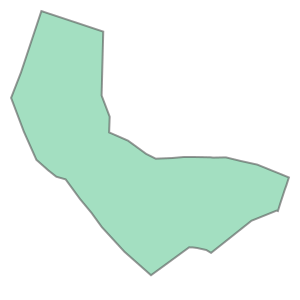

In [16]:
parshapes[134]

In [17]:
from shapely.plotting import plot_polygon

def plot_shape(shp,color):
    plot_polygon(shp, add_points=False, facecolor=color, edgecolor='k')

In [18]:
from matplotlib import pyplot as plt

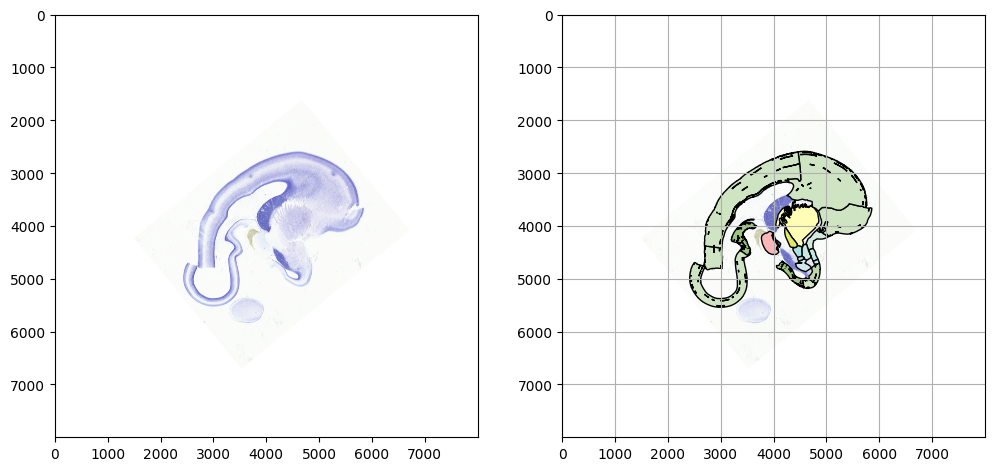

In [28]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(im_arr)

plt.subplot(1,2,2)
plt.imshow(im_arr)
for par,parshp in parshapes.items():
    
    color = ontohelper.onto_lookup[par].color_hex_triplet
    plot_shape(parshp,color)
    # break

In [17]:
from collections import defaultdict

In [29]:
group_regions = defaultdict(list)
group_areas = defaultdict(int)

fullarea = 0

for ontoid in annot:
    grp = ontohelper.get_group_by_ontoid(ontoid)
    shapes = annot[ontoid]
    count = len(shapes)
    area = sum([x.area for x in shapes])
    group_regions[grp].append((ontoid,count,area))
    group_areas[grp]+=area
    fullarea+=area


for grp,vals in group_regions.items():
    print(grp,group_areas[grp]/fullarea,len(vals))

HPF 0.03489960269751205 35
ft 0.04479758136773956 7
dev 0.004264530697871044 4
Ctx 0.5506461216234214 39
CB 0.04081355714387512 1
AMY_BN 0.09956298019743423 11
Mig 0.04205037903498548 2
TH 0.016912539815769893 2
Vs 0.16605270742139103 2


In [25]:
group_areas

defaultdict(int,
            {'HPF': 206219.43943257746,
             'ft': 264705.9394246085,
             'dev': 25198.829269786453,
             'Ctx': 3253731.4396132063,
             'CB': 241164.6043196761,
             'AMY_BN': 588311.0516331289,
             'Mig': 248472.9029061497,
             'TH': 99935.07692389424,
             'Vs': 981194.4433150298})